In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/merged-df/final-version-of-merged-df.csv
/kaggle/input/hatedataset/Morehatespeech.csv
/kaggle/input/mahaditask/validation.csv
/kaggle/input/mahaditask/train.csv
/kaggle/input/synback/synonym_backtranslation.csv
/kaggle/input/optimismdataset/optimism130.csv


In [1]:
df = pd.read_csv('/kaggle/input/mahaditask/train.csv')

NameError: name 'pd' is not defined

label
not_applicable    3697
hope              1892
hate              1301
Name: count, dtype: int64


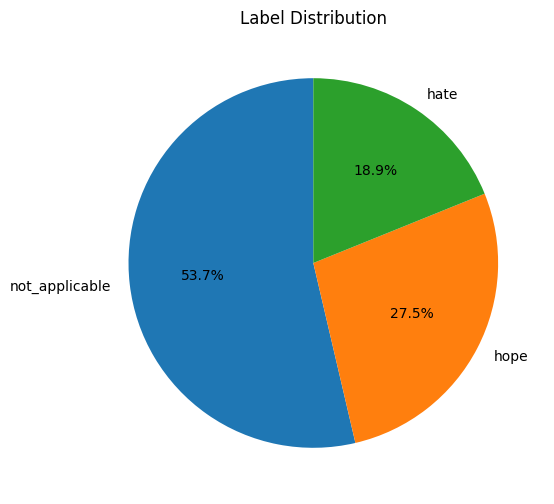

In [3]:
print(df['label'].value_counts())
import matplotlib.pyplot as plt

df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.ylabel('')  # Hide y-label
plt.title('Label Distribution')
plt.show()


**https://www.sciencedirect.com/science/article/pii/S2352340923008144?via%3Dihub**

In [4]:
optimism_data_130=pd.read_csv('/kaggle/input/optimismdataset/optimism130.csv')
optimism_data_130 = optimism_data_130.drop(columns=['Unnamed: 0'])
print(optimism_data_130.shape)

(130, 3)


**https://data.mendeley.com/datasets/mcnzzpgrdj/2**

In [5]:
hatedata = pd.read_csv('/kaggle/input/hatedataset/Morehatespeech.csv')
hatedata

,id,text,label
0,0,انا من الناس .. لما اشوف سيارة حلوة بالشارع .!...,hate
1,1,مآ آروع من یعآتبگ ; خوفآ عليگ !,hate
2,2,طال الزماااان وطال غيابك يا سلطان,hate
3,3,"""أنا نازح من سويسرا لهون"" ♡",hate
4,4,اقتلييييهااا مشان الله,hate
...,...,...,...
2391,2391,لا بدي اوقف بالشارع ويا ويل الي بمرق لابسها,hate
2392,2392,الشارع بدخن ....,hate
2393,2393,بنزيما سيء سيء كروس سيء ايسكو اليوم سيء تمركز ...,hate
2394,2394,انت اخو شرموطه اكيد\n,hate


**Synonym replacement on main dataset for more hope**

In [6]:
main_df=df


**loading synonym dataset**

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/mdanok/ArabicLT/master/csv/synonyms.csv"
synonyms_df = pd.read_csv(url, delimiter=';')

synonyms_df.head()


,ID,WORD,VOCALIZED,WORD_TYPE,SYNO_SET,SYNO_SET_VOCALIZED
0,1,ائتلاف,اِئْتِلاف,اسم,اجتماع;اتفاق,اِجْتِماع;اِتِفاق
1,2,ائتلف,اِئْتلفَ,فعل,اجتمع;اتّفق,اِجْتَمع;اِتَّفَق
2,3,ائتمام,اِئْتِمام,اسم,قصد;اقتداء,قَصْد;اِقْتِداء
3,4,ائتم,اِئْتَمّ,فعل,قصد,قَصَدَ
4,5,ائتم,اِئْتَم,فعل,اقتدى,اقْتَدى


**setting the dictionary of synonym**

In [8]:
# Create a dictionary: word -> list of synonyms
syn_dict = {}

for _, row in synonyms_df.iterrows():
    word = row['WORD'].strip()
    synos = row['SYNO_SET']
    if pd.isna(synos):
        continue
    syn_list = [syn.strip() for syn in synos.split(';') if syn.strip()]
    syn_dict[word] = syn_list


**Emoji,URLs will not be change only synonym will be applied**

In [9]:
import random
import re
import string

# Optional: install emoji package for better emoji detection
# pip install emoji
import emoji

# Regex pattern for URL detection (simple pattern)
url_pattern = re.compile(r'https?://\S+|www\.\S+')

def is_emoji(s):
    # Check if string contains at least one emoji
    return any(char in emoji.EMOJI_DATA for char in s)

def replace_with_synonyms_preserve(sentence, syn_dict):
    words = sentence.split()
    new_words = []
    
    for w in words:
        # Check if token is URL
        if url_pattern.match(w):
            new_words.append(w)
            continue
        
        # Check if token is emoji
        if is_emoji(w):
            new_words.append(w)
            continue
        
        # Check if token is punctuation only
        if all(char in string.punctuation for char in w):
            new_words.append(w)
            continue
        
        # Replace word with synonym if possible
        if w in syn_dict and syn_dict[w]:
            candidates = [syn for syn in syn_dict[w] if syn != w]
            if candidates:
                new_words.append(random.choice(candidates))
            else:
                new_words.append(w)
        else:
            new_words.append(w)
            
    return ' '.join(new_words)


In [10]:

lst = []
cnt = 0
for i in range (len(df)):
    if df['label'][i] != "hope":
        continue
    sentence = df['text'][i]
    lst.append(replace_with_synonyms_preserve(sentence, syn_dict))
    
    cnt+=1
    
    if cnt == 1675:
        break

sentence = """🌟 مرحبًا بك في موقعنا الجديد!
اكتشف المزيد من الميزات الرائعة هنا: https://example.com 🌐"""
print("Original:", sentence)
print("Synonym replaced:", replace_with_synonyms_preserve(sentence, syn_dict))


Original: 🌟 مرحبًا بك في موقعنا الجديد!
اكتشف المزيد من الميزات الرائعة هنا: https://example.com 🌐
Synonym replaced: 🌟 مرحبًا بك في موقعنا الجديد! اكتشف المزيد من الميزات الرائعة هنا: https://example.com 🌐


In [11]:
print(lst[: 2])  # print onl y first 5 elements


['أَثِقُ فِي قُدْرَتِي عَلَى التَّعَامُلِ مَعَ الصُّعُوبَاتِ.', 'سلاماً ياراحل عني .. القلب معك والروح معك .. وانا وراك اتبعك']


**applying backtranslation(ar->en->ar) to the replaced synonym sentence**

In [12]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=9aac3aa87bb52d554de8bee1a2109507148b15fc12503fb998a2ece6e9538a56
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hype

**Arabic to english**

In [13]:
from googletrans import Translator

def english_translate(text, src_lang='ar', mid_lang='en'):
    translator = Translator()
    
    # Step 1: Translate from source (Arabic) to middle language (English)
    translated_to_en = translator.translate(text, src=src_lang, dest=mid_lang).text

    # Step 2: Translate back from English to original language (Arabic)
    # back_translated = translator.translate(translated_to_en, src=mid_lang, dest=src_lang).text

    return translated_to_en

# Example usage
original = """🌟 مرحبًا بك في موقعنا الجديد!
اكتشف المزيد من الميزات الرائعة هنا: https://example.com 🌐"""
back_arabic = english_translate(original)

print("🔵 Original Arabic:", original)

print("🟣 Translated to english:", back_arabic)

import time

🔵 Original Arabic: 🌟 مرحبًا بك في موقعنا الجديد!
اكتشف المزيد من الميزات الرائعة هنا: https://example.com 🌐
🟣 Translated to english: 🌟 Welcome to our new site!
Find out more great features here: https://example.com 🌐


In [33]:
english_text = []

In [44]:
l=1401
r=1674
for i in range(l, r + 1):
    sentence = lst[i]
    translated = english_translate(sentence)
    english_text.append(translated)
    # print(translated)
    time.sleep(2)

In [45]:
len(english_text)

1675


**Synonym replacement in english**

In [46]:
len(english_text)

1675

In [47]:
!pip install spacy nltk
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.4 MB/s eta 0:00:0000:01
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 64.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

In [48]:
import spacy
from nltk.corpus import wordnet

nlp = spacy.load("en_core_web_sm")

def synonym_replacement_spacy(text):
    doc = nlp(text)
    new_sentence = []

    for token in doc:
        if token.pos_ in ["NOUN", "VERB", "ADJ", "ADV"]:
            syns = wordnet.synsets(token.text)
            if syns:
                lemmas = syns[0].lemmas()
                synonym = lemmas[0].name().replace("_", " ")
                new_sentence.append(synonym)
            else:
                new_sentence.append(token.text)
        else:
            new_sentence.append(token.text)
    
    return " ".join(new_sentence)


In [49]:
synonym_replaced_english = []

In [50]:
l=0
r=1674
for i in range(l, r + 1):
    sentence = english_text[i]
    translated = synonym_replacement_spacy(sentence)
    synonym_replaced_english.append(translated)

In [51]:
len(synonym_replaced_english)

1675

In [54]:
print(english_text[2])
print(synonym_replaced_english[2])

Without the semen in the passion, the soul of the pests, as the badness of the passion is a solution in which the merits are that the loved ones, if they are hidden, beware of them, they have signs that I do not take from God, whoever takes from God, whoever is in the heart of my heartThe cabinets have been taken into account for everything that is perceived and what is the love of love in my hearts of ends
Without the semen in the passion , the soul of the plague , as the bad of the passion is a solution in which the merit are that the love one , if they are hide , beware of them , they rich person sign that I do not return from God , whoever return from God , whoever is in the heart of my heartThe cabinet have been take into history for everything that is perceive and what is the love of love in my hearts of end


**converting english to arabic**

In [55]:
from googletrans import Translator

def arabic_translate(text, src_lang='ar', mid_lang='en'):
    translator = Translator()
    
    # Step 1: Translate from source (Arabic) to middle language (English)
    # translated_to_en = translator.translate(text, src=src_lang, dest=mid_lang).text

    # Step 2: Translate back from English to original language (Arabic)
    back_translated = translator.translate(text, src=mid_lang, dest=src_lang).text

    return back_translated

# Example usage
original = """My name is john cena"""
back_arabic = arabic_translate(original)

print("🔵 Original Arabic:", original)

print("🟣 Translated to english:", back_arabic)



🔵 Original Arabic: My name is john cena
🟣 Translated to english: اسمي جون سينا


In [56]:
final_lst = []

In [63]:
l=1178
r=1674
for i in range(l, r + 1):
    sentence = synonym_replaced_english[i]
    translated = arabic_translate(sentence)
    final_lst.append(translated)
    time.sleep(2)


In [ ]:
final_lst

In [64]:
len(final_lst)

1675

In [65]:
import csv

# Your list of text values
text_list = final_lst

# Create and write to a CSV file
with open("synonym_backtranslation.csv", mode="w", newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    
    # Write header
    writer.writerow(["id", "text", "label"])
    
    # Write rows
    for i, text in enumerate(text_list, start=1):
        writer.writerow([i, text, "hope"])


In [67]:
df1=pd.read_csv('/kaggle/input/mahaditask/train.csv')
df2=pd.read_csv('/kaggle/input/optimismdataset/optimism130.csv')
df3=pd.read_csv('/kaggle/input/hatedataset/Morehatespeech.csv')
df4=pd.read_csv('/kaggle/input/synback/synonym_backtranslation.csv')

print(df1.head(3))
print(df2.head(3))
print(df3.head(3))
print(df4.head(3))

     id                                               text           label
0  8167                       و لانني احب الاشياء الراقيه   not_applicable
1  1532  أَثِقُ فِي قُدْرَتِي عَلَى التَّعَامُلِ مَعَ ا...            hope
2  4710  وروضة بات طل الغيث ينسجها حتى إذا نسجت أضحى يد...  not_applicable
   Unnamed: 0  id                                               text label
0           0   0  وأشارت #منظمةالصحةالعالمية إلى أدلة مبكرة من ب...  hope
1           1   1  الله الحامي حتى من اللقاح نفسه ما راح يرك الا ...  hope
2           2   2  ازمة وراح تروح سلام يا موطني🇸🇦 حفظك الله من شر...  hope
   id                                               text label
0   0  انا من الناس .. لما اشوف سيارة حلوة بالشارع .!...  hate
1   1                   مآ آروع من یعآتبگ ; خوفآ عليگ  !  hate
2   2                 طال الزماااان وطال غيابك يا سلطان   hate
   id                                               text label
0   1                      أنا أثق في قدرتي على المتاعب.  hope
1   2  السلام على عاتق

In [70]:
# Concatenate all dataframes
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

merged_df.to_csv('final-version-of-merged-df.csv',index=False)

In [72]:
df=pd.read_csv('/kaggle/input/merged-df/final-version-of-merged-df.csv')

In [73]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,text,label,Unnamed: 0
0,8167,و لانني احب الاشياء الراقيه,not_applicable,NaN
1,1532,أَثِقُ فِي قُدْرَتِي عَلَى التَّعَامُلِ مَعَ ا...,hope,NaN
2,4710,وروضة بات طل الغيث ينسجها حتى إذا نسجت أضحى يد...,not_applicable,NaN
3,6084,أَشْعُرُ بِقَلْبِي العَنِيدِ وَهُوَ يَحَارُبُ ...,not_applicable,NaN
4,8968,@MoaElshamy بتحسسني اني مرتضى ده كان بيدي واحد...,not_applicable,NaN
...,...,...,...,...
11086,1671,إطلاق النار ، ربنا يمنحنا ، لكنني أشير إلى الب...,hope,NaN
11087,1672,تقرر جميع المرأة من خلال ميزة ، لكنك الشخص الذ...,hope,NaN
11088,1673,جذب درس في الحديقة جد علامات الأخ الذي يجيب عل...,hope,NaN
11089,1674,إذا كان حب الحب مريرة ، يا قامر.,hope,NaN


In [74]:
df['label'].value_counts()

label
not_applicable    3697
hope              3697
hate              3697
Name: count, dtype: int64

label
not_applicable    3697
hope              3697
hate              3697
Name: count, dtype: int64


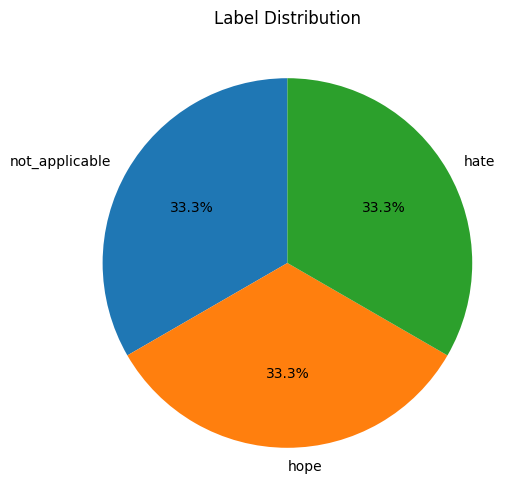

In [75]:
print(df['label'].value_counts())
import matplotlib.pyplot as plt

df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.ylabel('')  # Hide y-label
plt.title('Label Distribution')
plt.show()
